In [61]:
# Initialize Otter
import otter
grader = otter.Notebook("hw01.ipynb")

# HW 1 Coding: Plotting and the Permutation Test
## Due Date: Thursday, January 30th, 11:59 PM

You must submit this assignment to Gradescope by the on-time deadline, Thursday, January 30th, 11:59 PM. Please read the syllabus for the Slip Day policy. No late submissions beyond the details in the Slip Day policy will be accepted. While course staff is happy to help you if you encounter difficulties with submission, we may not be able to respond to late-night requests for assistance (TAs need to sleep, after all!). **We strongly encourage you to plan to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to contact staff for submission support. 

This is part of a two-part assignment. After completing this part ("Homework 1 Coding"), please submit the generated zip file to the Homework 1 Coding assignment on Gradescope. Gradescope will automatically submit a PDF of your written responses to the HW 1 Coding Written assignment; there is no need to submit it manually. Note that you will have to submit HW 1 Math Prerequisites manually and assign pages accordingly. 

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you 
discuss the assignments with others, please **include their names** below.

**Collaborators**: *list collaborators here*

## This Assignment

The purpose of this assignment is for you to combine Python, math, and the ideas in Data 8 to draw some interesting conclusions. The methods and results will help build the foundation of Data 100.

## Score Breakdown
Question | Manual? | Points
--- | --- | --
1a | No | 2
1b(i) | No | 1
1b(ii) | No | 1
1c | Yes | 2
1d | No | 2
1e | Yes | 1
1f | No | 1
1g | Yes | 1
Total |   | 11

**Note**: "Manual" questions are written response questions that will be graded manually by the grading team instead of being graded by the autograder.

## Before You Start

### Syllabus Quiz

Make sure you complete the [Syllabus Quiz Gradescope assignment](https://www.gradescope.com/courses/949942/assignments/5620365) by **Thursday, January 30th, 11:59 PM PT**. All answers to the questions can be found in the [syllabus on the course website](https://ds100.org/sp25/syllabus/).

### Autograder and Answer Cells

For each question in the assignment, please write down your answer in the answer cell(s) right below the question. 

We understand that it is helpful to have extra cells breaking down the process toward reaching your final answer. If you happen to create new cells *below* your answer to run code, **NEVER** add cells between a question cell and the answer cell below it. It may cause errors when we run the autograder, and it will cause a failure to generate the PDF file.


**Important note: The local autograder tests will not be comprehensive.** They are meant to give you some useful feedback, but it's your responsibility to ensure your response answers the question correctly. There may be other tests that we run when scoring your notebooks. We **strongly recommend** that you check your solutions yourself rather than just relying on the test cells.

### Initialize your environment

The below cell should run without error if you're using the course DataHub.

In [62]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Preliminary: Jupyter Shortcuts ###

Here are some useful Jupyter notebook keyboard shortcuts.  To learn more keyboard shortcuts, go to **Help -> Keyboard Shortcuts** in the menu above. 

Here are a few we like:
1. `ctrl`+`return` : *run the current cell*
1. `shift`+`return`: *run the current cell and move to the next*
1. `esc` : *command mode* (may need to press before using any of the commands below)
1. `a` : *create a cell above*
1. `b` : *create a cell below*
1. `dd` : *delete a cell*
1. `m` : *convert a cell to markdown*
1. `y` : *convert a cell to code*

### Preliminary: `NumPy` ###

You should be able to understand the code in the following cells. If not, review the following:

* [Data 8 Textbook Chapter on NumPy](https://www.inferentialthinking.com/chapters/05/1/Arrays)
* [DS100 NumPy Review](http://ds100.org/fa17/assets/notebooks/numpy/Numpy_Review.html)
* [Condensed NumPy Review](http://cs231n.github.io/python-numpy-tutorial/#numpy)
* [The Official NumPy Tutorial](https://numpy.org/doc/stable/user/quickstart.html)

**Jupyter pro-tip**: Pull up the documentation for any function in Jupyter by running a cell with
the function name and a `?` at the end:

In [63]:
np.arange?

**Another Jupyter pro-tip**: Pull up the documentation for any function in Jupyter by typing the function
name, then `<Shift><Tab>` on your keyboard. This is super convenient when you forget the order
of the arguments to a function. You can press `<Tab>` multiple times to expand the docs and reveal additional information.

Try it on the function below:

In [64]:
np.linspace

<function linspace at 0x000001F02B601C30>

### Preliminary: LaTeX ###
You should use LaTeX to format math in your answers. If you aren't familiar with LaTeX, don't worry. It's not hard to use in a Jupyter notebook. Just place your math in between dollar signs within Markdown cells:

`$ f(x) = 2x $` becomes $ f(x) = 2x $.

If you have a longer equation, use double dollar signs to place it on a line by itself:

`$$ \sum_{i=0}^n i^2 $$` becomes:

$$ \sum_{i=0}^n i^2$$


You can align multiple lines using the `&` anchor, `\\` newline, in an `align` block as follows:

```
\begin{align}
f(x) &= (x - 1)^2 \\
&= x^2 - 2x + 1
\end{align}
```
becomes

\begin{align}
f(x) &= (x - 1)^2 \\
&= x^2 - 2x + 1
\end{align}

* [This PDF](latex_tips.pdf) has some handy LaTeX tips.
* [For more about basic LaTeX formatting, you can read this article.](https://www.sharelatex.com/learn/Mathematical_expressions)


### Preliminary: Sums ###

Here's a recap of some basic algebra written in sigma notation. The facts are all just applications of the ordinary associative and distributive properties of addition and multiplication, written compactly and without the possibly ambiguous "$\dots$". But if you are ever unsure of whether you're working correctly with a sum, you can always try writing $\sum_{i=1}^n a_i$ as $a_1 + a_2 + \cdots + a_n$ and see if that helps.

You can use any reasonable notation for the index over which you are summing, just as in Python you can use any reasonable name in `for name in list`. Thus $\sum_{i=1}^n a_i = \sum_{k=1}^n a_k$.

- $\sum_{i=1}^n (a_i + b_i) = \sum_{i=1}^n a_i + \sum_{i=1}^n b_i$
- $\sum_{i=1}^n d = nd$
- $\sum_{i=1}^n (ca_i + d) = c\sum_{i=1}^n a_i + nd$

These properties may be useful in the future when we cover Least Squares Predictors. To see the LaTeX we used, double-click this cell. Evaluate the cell to exit.

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Question 1: Distributions ##

Visualizing distributions, both categorical and numerical, helps us understand variability. In Data 8, you visualized numerical distributions by drawing histograms ([Chapter 7.2 link](https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html#histogram)), which look like bar charts but represent proportions through the *areas* of the bars instead of the heights or lengths.


---

### Part 0: Matplotlib Tutorial

We will not be using Data 8's `datascience` library in this course. Instead, we will learn industry——and academia——standard libraries for exploring and visualizing data, including `matplotlib` ([official website](https://matplotlib.org/)).
In this exercise, you will use the `hist` function in `matplotlib` instead of the corresponding `Table` method to draw histograms. In a previous cell, we imported the matplotlib library as `plt`, which allows us to call `plt.hist()`.

To start off, suppose we want to plot the probability distribution of the number of spots on a single roll of a die. That should be a flat histogram since the chance of each of the values 1 through 6 is $\frac{1}{6}$. Here is a first attempt at drawing the histogram.

range(1, 7)


(array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

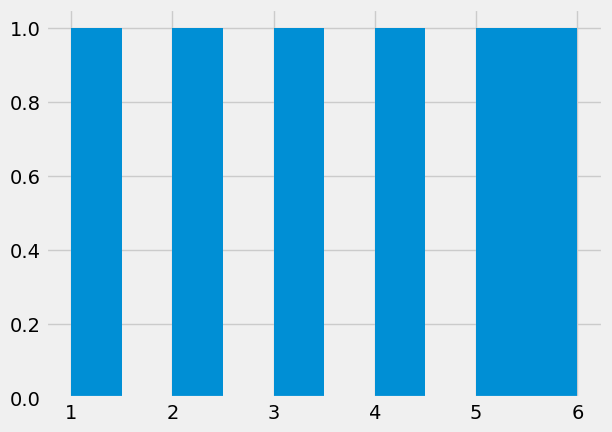

In [65]:
faces = range(1, 7)
print(faces)
plt.hist(faces)

This default plot is not helpful. We have to choose some arguments to get a visualization that we can interpret. 

Note that the second printed line shows the left ends of the default bins, as well as the right end of the last bin. The first line shows the counts in the bins. If you don't want the printed lines, you can add a semi-colon `;` at the end of the call to `plt.hist`, but we'll keep the lines for now.

Let's redraw the histogram with bins of unit length centered at the possible values. By the end of the tutorial, you'll see a reason for centering. Notice that the argument for specifying bins is the same as the one for the `Table` method `hist` from the `datascience` library in Data 8 ([link](https://www.data8.org/datascience/reference-nb/datascience-reference.html#tbl.hist())).

(array([1., 1., 1., 1., 1., 1.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

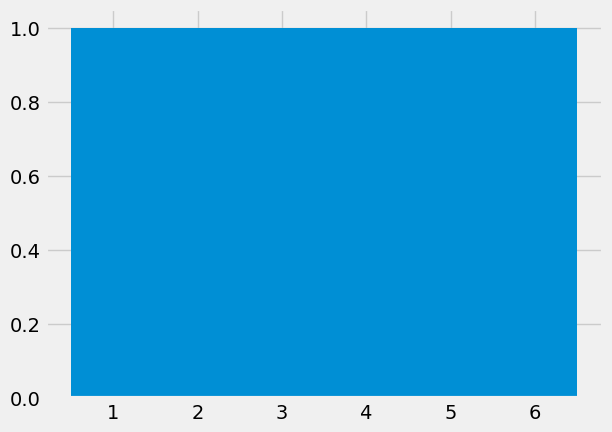

In [66]:
unit_bins = np.arange(0.5, 6.6)
plt.hist(faces, bins=unit_bins)

We need to see the edges of the bars! Let's specify the edge color `ec` to be `white`. [Here](https://matplotlib.org/3.5.3/gallery/color/named_colors.html) are all the colors you could use, but do try to drag yourself away from the poetic names.

(array([1., 1., 1., 1., 1., 1.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

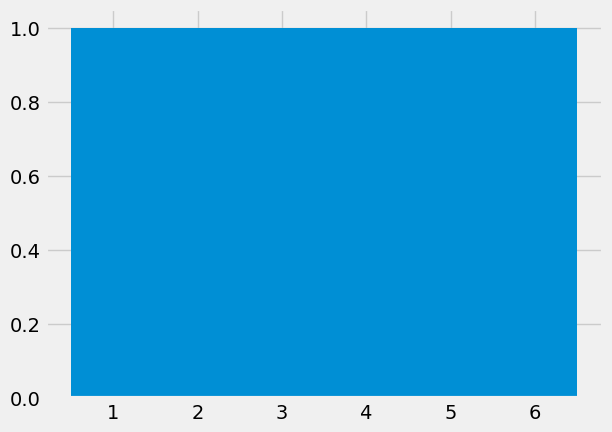

In [67]:
plt.hist(faces, bins=unit_bins, ec='white')

That's much better, but look at the vertical axis. It is not drawn to the density scale defined in Data 8 ([Chapter 7.2 link](https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html#the-vertical-axis-density-scale)). We want a histogram of a probability distribution, so the total area should be 1. We just have to ask for that by setting `density` to `True`.

(array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

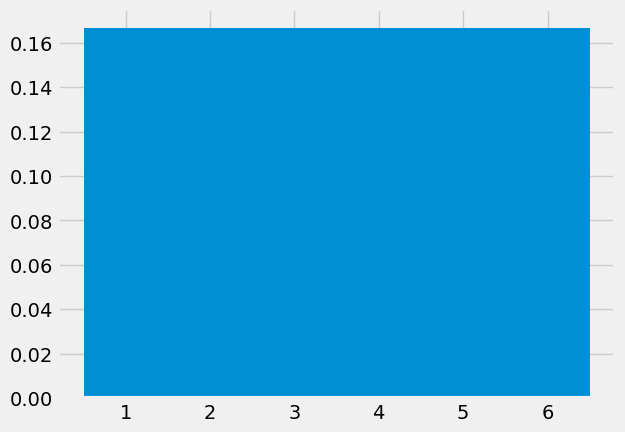

In [68]:
plt.hist(faces, bins=unit_bins, ec='white', density=True)

That's the probability histogram of the number of spots on one roll of a die. The proportion is $\frac{1}{6}$ in each of the bins.


Finally, we can set the opacity, or transparency, of the bars with the `alpha` parameter, which is a value from 0 to 1. For 70% opacity:

(array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

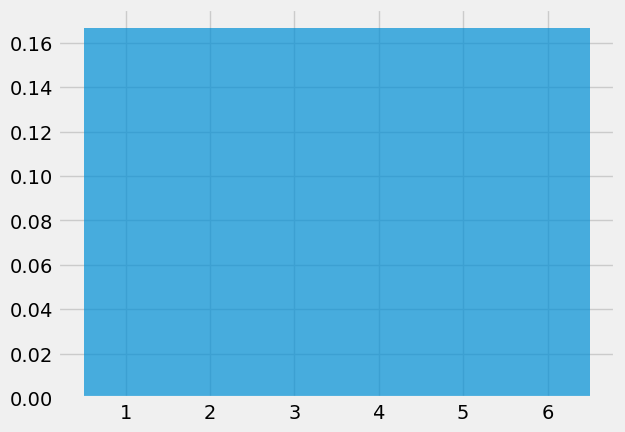

In [69]:
plt.hist(faces, bins=unit_bins, ec='white', density=True, alpha=0.7)

**Note/Reminder**: The above cells printed the counts/proportions and bin boundaries with the visualization. This was intentional on our part to show you how `plt.hist()` returned different values per plot. You may use a semicolon `;` on the last line to suppress additional display as needed.

<br/><br/>

---

### Question 1a

Define a function `plot_distribution` that takes an array of numbers (integers or decimals) and draws the histogram of the distribution using unit bins centered at the integers and white edges for the bars.

The histogram should be drawn to the density scale, and the opacity should be 75%. The left-most bar should be centered at the integer closest to the smallest number in the array, and the right-most bar should be centered around the integer closest to the largest number in the array.

The display does not need to include the printed proportions and bins. No titles or labels are required for this question. For grading purposes, assign your plot to `histplot`.

If you have trouble defining the function, go back and carefully read all the lines of code that resulted in the probability histogram of the number of spots on one roll of a die. Pay special attention to the bins. Feel free to create a cell to test your function on generic arrays to check for correctness!

**Hint**: 
* See `plt.hist()` [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).
* We want to: (1) center each bin at integer values and (2) make sure all the values in the array are captured by the bins.
    * For example, let’s say we have the following input array: `[0.3, 0.7, 1.1, 1.4, 1.9]`.
    * The smallest value is `0.3`; the left endpoint of the leftmost bin (the first bin) should be `-0.5` and the rightmost endpoint of this bin should be `0.5` so that this bin is centered at the integer `0`.
    * This first bin above captures `0.3`. The second bin will be centered at `1` (between `0.5` and `1.5`) and captures `0.7`, `1.1`, and `1.4`.
    * We can continue in this manner until all values are captured by our bins.
* What is the left endpoint of the left-most bar? What is the right endpoint of the right-most bar? You may find `min()`, `max()`, and `round()` helpful.
* Please keep in mind your function should be implemented so that it works for _any_ generic array of numbers (integers or decimals), not just the `faces` array in the cell below.
* If you implement the function correctly, you should get a plot like this:

<img src="q1a.png">

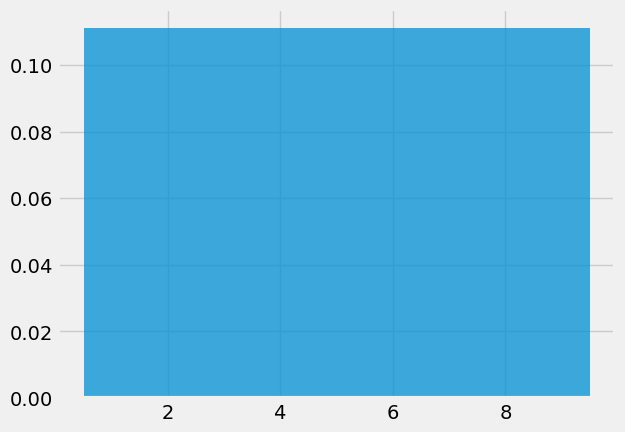

In [70]:
def plot_distribution(arr):
    # Define bins
    minn = round(min(arr))
    maxx = round(max(arr))
    unit_bins = np.arange(minn-0.5, maxx+1.5)
    # Plot the data arr using unit_bins, assign the plot to histplot
    histplot = plt.hist(arr, bins = unit_bins, ec='white', density=True, alpha=0.75)
    return histplot
faces = range(1, 10)
histplot = plot_distribution(faces)

In [71]:
grader.check("q1a")

q1a results: All test cases passed!

<br/>

---

### Tutorial: Serum Cholesterol

Recall from Data 8 that you can perform [hypothesis testing using the permutation test](https://inferentialthinking.com/chapters/12/1/AB_Testing.html) (Chapter 12.1). **Before continuing, we HIGHLY ENCOURAGE you to read the above linked Data 8 chapters for a review of how hypothesis testing works.**

Scientists across several hospitals have gathered data about heart disease and non-disease patients, and they are organized into the following dataset called `hearts_df` (from the `csv` file `hearts.csv`). In this question, we study one recorded feature in `hearts_df`: serum cholesterol. Serum cholesterol refers to the total amount of cholesterol in one’s blood. Further details about the dataset are discussed in [this Kaggle page](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).
In this assignment, we will investigate whether patients with heart disease have different serum cholesterol levels than patients without heart disease.

**Run the below cell**, which assigns `non_disease_chol` to a list of serum cholesterol values of patients without heart disease (of which there are 390), and `disease_chol` to a list of serum cholesterols of patients with heart disease (of which there are 356).

In [72]:
# Just run this cell. You will learn these functions soon!

import pandas as pd
hearts_df = pd.read_csv("hearts.csv")

non_disease_chol = hearts_df[hearts_df['HeartDisease'] == 0]['Cholesterol'].values
print(len(non_disease_chol))

disease_chol = hearts_df[hearts_df['HeartDisease'] == 1]['Cholesterol'].values
print(len(disease_chol))

390
356


Suppose that we overlay the distributions of cholesterol levels from the two groups:

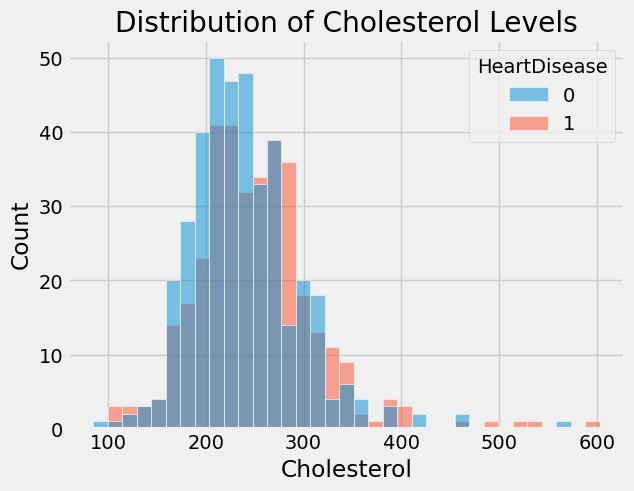

In [73]:
# Just run this cell. You will learn these functions soon!

import seaborn as sns
sns.histplot(hearts_df, x="Cholesterol", hue="HeartDisease");
plt.title("Distribution of Cholesterol Levels");

In the plot above, `0` indicates data from patients without heart disease, and `1` indicates data from patients with heart disease. The distribution of serum cholesterol of patients without heart disease is centered slightly left of the distribution corresponding to those with heart disease. Specifically, the **average** serum cholesterol of patients without heart disease appears lower than that of patients with heart disease.

<br/>    
As mentioned in the introduction of this question, we'd like to study whether this difference reflects just chance variation or perhaps a difference in the distributions in the larger population. Suppose we propose the following two hypotheses:

> **Null hypothesis ($\mathcal{H}_0$)**: In the population, the distribution of serum cholesterol of non-patients is the same for heart disease patients. The (observed) difference in the sample is due to chance.

> **Alternative hypothesis ($\mathcal{H}_1$)**: In the population, the distribution of serum cholesterol of non-patients is **different** from that of heart disease patients.

We would like to perform hypothesis testing using the permutation test. One way to do so is to compute an observed test statistic and then compare it with multiple simulated test statistics generated through random permutations.


<br/><br/>

---
### Question 1b

In this question, we will confirm some details about the hypothesis testing operations proposed.

#### Question 1b(i)
Given the study description and hypotheses outlined above, select the statement that most accurately describes the hypothesis test we conducted. Answer this question by entering the letter corresponding to your answer in the variable `q1bi` below. 

**A.** The hypothesis test is one-sided.  The null hypothesis is rejected when the average serum cholesterol of patients with heart disease is significantly higher than that of patients without heart disease. \
**B.** The hypothesis test is two-sided because we are comparing the average serum cholesterol of two different groups. \
**C.** The hypothesis test is two-sided. The null hypothesis is rejected when the average serum cholesterol of patients with heart disease is significantly higher or lower than that of patients without heart disease. \
**D.** The hypothesis test is two-sided because the test statistic, the difference in means, is symmetrically distributed. In other words, the two halves of the distribution closely resemble each other, so the test is two-sided.

Answer in the following cell. Your answer should be a string, either `"A"`, `"B"`, `"C"`, or `"D"`.

**Hint**: Visit just the first few paragraphs of [this page](https://www.stat.berkeley.edu/~spector/s133/Random1.html) to refresh your knowledge on the differences between "one-sided" and "two-sided" tests.

In [74]:
q1bi = "C"

In [75]:
grader.check("q1bi")

q1bi results: All test cases passed!

#### Question 1b(ii)

Suppose that we choose a reasonable test statistic as the **absolute difference** between the average cholesterol level of patients with heart disease and the corresponding average for patients without heart disease.
In the cell below, assign `observed_difference` to the observed value of the test statistic computed from our original samples: `non_disease_chol` and `disease_chol`.

**Hint**: This test statistic is slightly different from what is presented in the Data 8 textbook, [Chapter 12.1 link](https://inferentialthinking.com/chapters/12/1/AB_Testing.html#the-hypotheses).

In [76]:
observed_difference = abs(np.mean(disease_chol) - np.mean(non_disease_chol))
observed_difference

np.float64(12.292566983578212)

In [77]:
grader.check("q1bii")

q1bii results: All test cases passed!

<!-- BEGIN QUESTION -->

<br/><br/>

---

### Question 1c

Before we write any code, let’s review the idea of hypothesis testing with the permutation test. It follows the procedure below: 
1. We first simulate the experiment many times (say, 10,000 times) using [random permutation](https://inferentialthinking.com/chapters/12/1/AB_Testing.html#predicting-the-statistic-under-the-null-hypothesis) (i.e., without replacement) (i.e., under the assumption that the null hypothesis is true). This simulated sampling process produces an empirical distribution of many values of a predetermined test statistic (say, 10,000 values). 
2. Then, we compare our one true observed test statistic to this empirical distribution of simulated test statistics to compute an empirical p-value. 
3. Finally, we compare this p-value to a particular cutoff threshold (often, 0.05) to decide whether we fail to reject the null hypothesis.

In the cell below, answer the following questions:
* What does an empirical p-value from a permutation test mean in this particular context of serum cholesterol and having heart disease?
* Suppose the empirical p-value is $p=0.15$, and our p-value cutoff threshold is $0.01$. Do we reject or fail to reject the null hypothesis? Why?

proportion of simulated test statistics that have bigger absolute values than the observed test statistic.

reject the null hypothesis because the p-value is greater than the cutoff threshold.

<!-- END QUESTION -->

<br/><br/>

---

### Question 1d

Now, we begin the permutation test by generating an array called `differences` that contains simulated values of our test statistic from **10,000 permuted samples**. Again, note that our test statistic differs from what is in the Data 8 textbook: we are computing the **absolute** difference between the average cholesterol levels of patients with heart disease and without heart diseases, where labels have been assigned at random (i.e., in a world where the null hypothesis is true, so disease status is arbitrary and should have no effect on cholesterol).

**Reminder**: Data 100 does **not** support the `datascience` library, so you should instead use the appropriate functions from the `NumPy` library. Some suggested references: Lab 01 (for a quick `NumPy` tutorial), `NumPy` array indexing/slicing [documentation](https://numpy.org/doc/stable/user/basics.indexing.html), `np.random.choice` [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) (in particular, the `size` and `replace` parameters), and `np.append` [documentation](https://numpy.org/doc/stable/reference/generated/numpy.append.html).

**Note**: We have provided some optional skeleton code below, but you do not need to follow it. However, please still assign your simulated differences to the array `differences`.

In [78]:
np.random.seed(42) # Do not modify this line.

# Create an empty array to hold our simulated differences
differences = np.array([]) 
# Set number of repetitions
repetitions = 10000
# Combine the two arrays into a single array
all_cholestrol = np.append(non_disease_chol, disease_chol)

for i in np.arange(repetitions):
    # Permute all_cholestrol
    shuffled_cholesterols = np.random.choice(all_cholestrol, size=len(all_cholestrol), replace=False)
    
    # Make the simulated patient and non-patient group
    sim_non_disease_chol = shuffled_cholesterols[:len(non_disease_chol)]
    sim_disease_chol = shuffled_cholesterols[len(non_disease_chol):]
    
    # Calculate test statistics
    sim_difference = np.abs(np.mean(sim_disease_chol) - np.mean(sim_non_disease_chol))
    
    # Append the test statistics in differences
    differences = np.append(differences, sim_difference)

differences

array([1.68284356, 1.86339672, 2.19115529, ..., 1.52165082, 1.54851628,
       3.50432152], shape=(10000,))

In [79]:
grader.check("q1d")

q1d results: All test cases passed!

<!-- BEGIN QUESTION -->

<br/><br/>

---

### Question 1e

The array `differences` is an empirical distribution of the test statistic simulated under the null hypothesis. This is a prediction about the test statistic, based on the null hypothesis.

Use the `plot_distribution` function you defined in an earlier part to plot a histogram of this empirical distribution. Because you are using this function, your histogram should have unit bins, with bars centered at integers. No title or labels are required for this question.

**Hint**: This part should be very straightforward.


(array([9.330e-02, 1.775e-01, 1.672e-01, 1.462e-01, 1.185e-01, 9.650e-02,
        6.910e-02, 5.110e-02, 3.340e-02, 1.930e-02, 1.320e-02, 7.300e-03,
        4.600e-03, 1.800e-03, 8.000e-04, 0.000e+00, 1.000e-04, 1.000e-04]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <BarContainer object of 18 artists>)

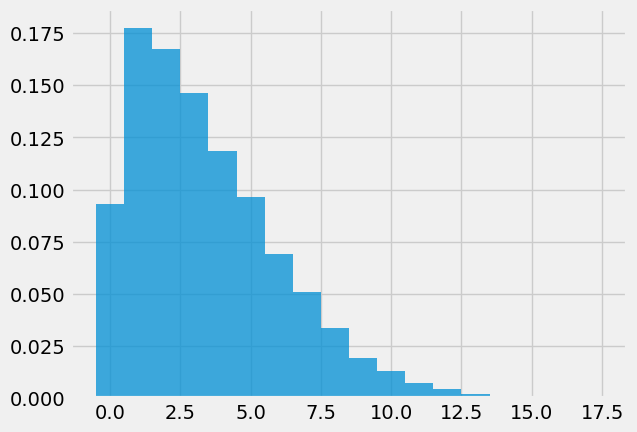

In [80]:
plot_distribution(differences)

<!-- END QUESTION -->

<br/><br/>

---

### Question 1f

Compute `empirical_p`, the empirical p-value based on `differences`, the empirical distribution of the test statistic, and `observed_difference`, the observed value of the test statistic.

**Hint**: 
* Review the conclusion of the [Data 8 textbook example](https://inferentialthinking.com/chapters/12/1/AB_Testing.html#conclusion-of-the-test) in Chapter 12.1.
* There are two main differences between this example and the Data 8 example. The first being that our test statistic is different. The second is that our hypothesis is different. How can you adjust the code from the Data 8 example to calculate `empirical_p`?

In [81]:
empirical_p = np.sum(differences >= observed_difference) / len(differences)
empirical_p

np.float64(0.0033)

In [82]:
grader.check("q1f")

q1f results: All test cases passed!

<!-- BEGIN QUESTION -->

<br/><br/>

---

### Question 1g

Based on your computed empirical p-value, do we reject or fail to reject the null hypothesis? Use the p-value cutoff proposed in Question 1c of $0.01$, or $1\%$. 


_for 0.01 we fall to reject the null hypothesis.

<!-- END QUESTION -->

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 1 Coding!

Helios and Pishi are here to congratulate you :)
<center>
<img src = "IMG_1000.jpg" width = "350"> <img src = "IMG_8569.jpg" width = "350">

### Submission Instructions

Below, you will see one cell. Running this will automatically generate a zip file with your answers. Please submit this file to the Homework 1 Coding assignment on Gradescope. Gradescope will automatically submit the PDF from this file to the Homework 1 Coding Written assignment. **There is no need to manually submit Homework 1 Written answers; however, please check that the PDF was generated and submitted correctly**.

You are responsible for submitting the zip file generated below as well as a PDF with your answers to Homework 1 Math Prerequisites. **You are also responsible for submitting the [Syllabus Quiz Gradescope assignment](https://www.gradescope.com/courses/949942/assignments/5620365).**
* **Homework 1 Coding**: Submit your Jupyter Notebook zip file for Homework 1 Coding,
which can be generated and downloaded from DataHub by using the `grader.export()`
cell provided below.
* **Homework 1 Written**: Gradescope will automatically submit the PDF from the zip file submitted earlier. You do not need to submit anything to this assignment yourself, but please check that the submission went through properly.  
* **Homework 1 Math Prerequisites**: Submit a PDF to Gradescope that contains your answers to all questions in Homework 1 Math Prereqs.
* **[Syllabus Quiz](https://www.gradescope.com/courses/949942/assignments/5620365)**: The assignment is multiple-choice style on Gradescope. You may change or update your answers anytime before the deadline.

**Important**: When submitting Homework 1 Math Prerequisites on Gradescope, you **must tag pages to each question correctly** (it prompts you to do this after submitting your work). This significantly streamlines the grading process for our readers. Failure to do this may result in a score of 0 for untagged questions.

To receive credit on this assignment, **you must submit both your coding and written
portions to their respective Gradescope portals as well as the syllabus quiz.** 

**You are responsible for ensuring your submission follows our requirements and that the automatic submission for Homework 1 Coding Written answers went through properly. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [83]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

C:\Users\ZnH2\anaconda3\envs\statistics\Lib\site-packages\otter\check\notebook.py:494: UserWarning: Could not locate a PDF to include
  warnings.warn("Could not locate a PDF to include")
